# Lab 7.2: Нейронні мережі в розпізнаванні образів. Частина 1
### Шевченко Юлія, ФІ-31мн

In this homework, we are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The goal of this homework is to go through the steps described below and to implement the necessary code.

In the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
# All the imports for the task
import os
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Step 1: Downloaded dataset and unzipped it
# Visit the link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

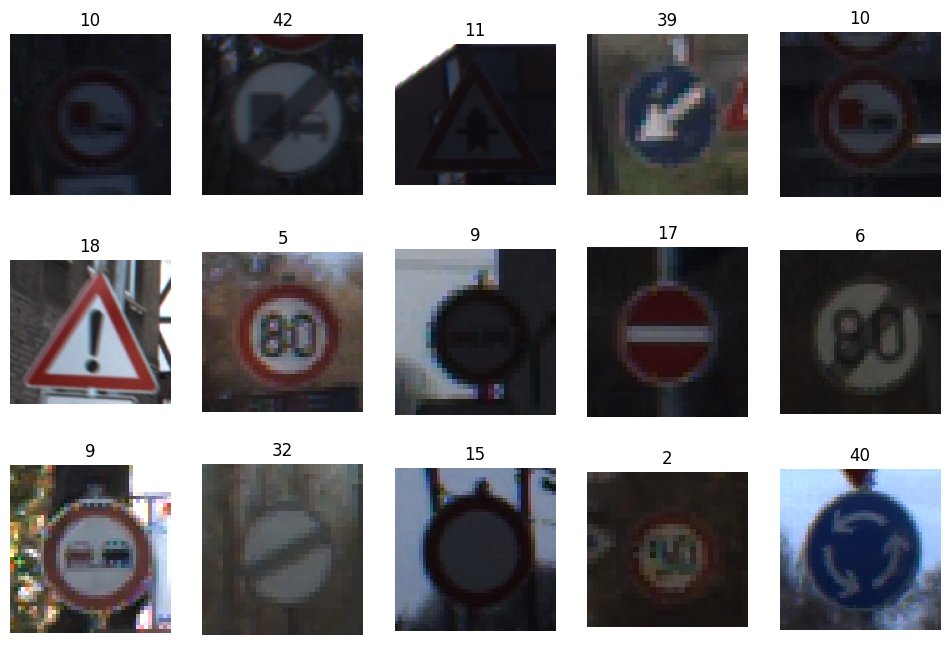

In [3]:
# Step 2: Load the training labels
root = '../Lab_7/gtsrb'  # Path to the dataset location
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples
num_samples = len(data)

# Show random data samples
plt.figure(figsize=(12, 8))
for image_index in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3, 5, image_index + 1)
    plt.imshow(img)
    plt.title(data.iloc[idx]['ClassId'])
    plt.axis('off')
plt.show()

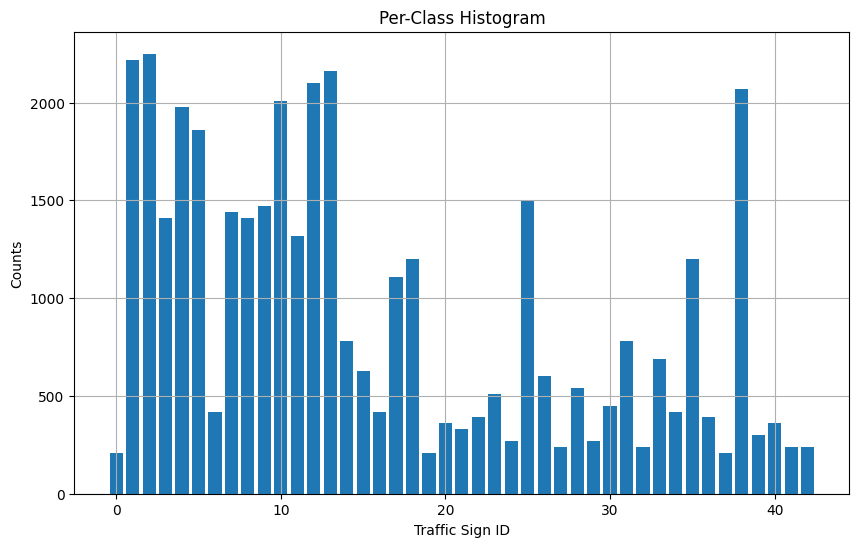

In [4]:
# Step 3: Inspect the dataset by computing and plotting the per-class histogram
# Extract class identifiers
ids = data['ClassId']

# Compute the per-class histogram
hist = Counter(ids)

plt.figure(figsize=(10, 6))
plt.bar(hist.keys(), hist.values())
plt.grid(True)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Counts')
plt.title('Per-Class Histogram')
plt.show()

## Questions

#### Question 1: Do you consider the dataset to be balanced? If so, why? If not, why?

The balance of a dataset refers to the distribution of samples across different classes. A balanced dataset typically has roughly equal numbers of samples for each class, while an imbalanced dataset has significantly different numbers of samples across classes.

To determine if the GTSDB dataset is balanced, we can examine the per-class histogram plotted in Step 3. If the histogram shows roughly equal heights for each bar (representing each class), then the dataset can be considered balanced. However, if there are significant differences in the heights of the bars, the dataset may be imbalanced.

Based on the per-class histogram plotted from the GTSDB dataset, it appears that the dataset is not balanced. This is because the heights of the bars representing different traffic sign classes vary significantly. Some classes have a much higher number of samples compared to others, indicating an imbalance in the dataset. Therefore, the dataset cannot be considered balanced.

#### Question 2: Are there any classes that are (significantly) over-represented or under-represented?

Identifying over-represented or under-represented classes is essential for understanding the dataset's biases and potential limitations. Over-represented classes have a disproportionately high number of samples, while under-represented classes have too few samples compared to other classes.

Yes, there are classes that are significantly over-represented or under-represented in the GTSDB dataset. This can be observed from the per-class histogram. Classes with taller bars are over-represented, while those with shorter bars are under-represented.

For example, we can give TOP-3 over-represented and TOP-3 under-represented classes:
- Class 2: 2250 values
- Class 1: 2220 values
- Class 13: 2160 values
- ...
- Class 0: 210 values
- Class 19: 210 values
- Class 37: 210 values

It's important to address these imbalances during model training to prevent biased predictions and ensure fair performance evaluation across all classes. Techniques such as data augmentation, resampling, or class weighting can be applied to mitigate the effects of class imbalance during training.

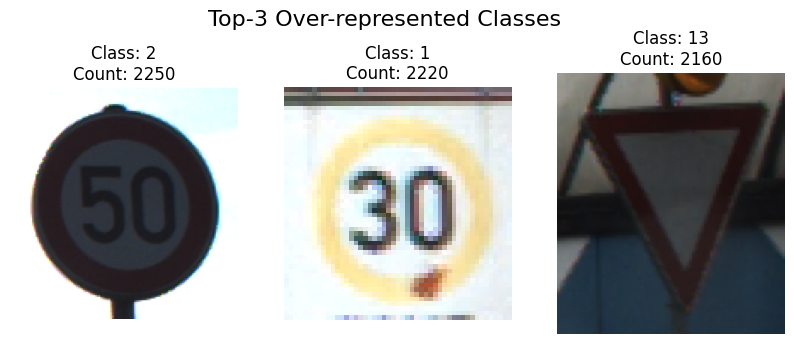

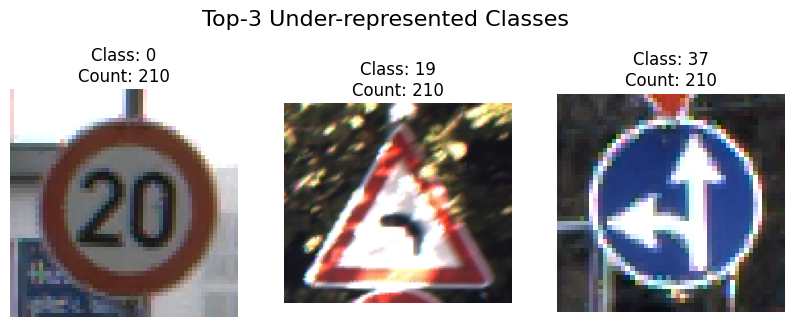

In [5]:
# Identify top-3 over-represented and under-represented classes
sorted_hist = sorted(hist.items(), key=lambda x: x[1], reverse=True)
top_3_overrepresented = sorted_hist[:3]
top_3_underrepresented = sorted_hist[-3:]

# Display top-3 over-represented classes
plt.figure(figsize=(10, 4))
plt.suptitle('Top-3 Over-represented Classes', fontsize=16)
for i, (class_id, count) in enumerate(top_3_overrepresented):
    plt.subplot(1, 3, i + 1)
    # Select a random image from the class
    img_path = data[data['ClassId'] == class_id].sample(1)['Path'].values[0]
    img = cv2.imread(os.path.join(root, img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f'Class: {class_id}\nCount: {count}')
    plt.axis('off')
plt.show()

# Display top-3 under-represented classes
plt.figure(figsize=(10, 4))
plt.suptitle('Top-3 Under-represented Classes', fontsize=16)
for i, (class_id, count) in enumerate(top_3_underrepresented):
    plt.subplot(1, 3, i + 1)
    # Select a random image from the class
    img_path = data[data['ClassId'] == class_id].sample(1)['Path'].values[0]
    img = cv2.imread(os.path.join(root, img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f'Class: {class_id}\nCount: {count}')
    plt.axis('off')
plt.show()

#### Question 3: Perform a further analysis on the dataset and draw some conclusion from it.

To perform a further analysis on the dataset, we can explore the distribution of spatial resolutions and brightness across different classes of traffic signs. This analysis can provide insights into the variability of the dataset and potential biases that may exist.

##### Spatial Resolution Distribution:

We can calculate the spatial resolution (width and height) of each image in the dataset and then analyze the distribution of these resolutions. This analysis will help us understand the range of resolutions present in the dataset and whether there are any trends or patterns.

##### Brightness Distribution:

Similarly, we can analyze the brightness levels of the images in the dataset. We can calculate the average brightness of each image and then examine the distribution of these brightness values across different classes. This analysis can help identify if there are any classes that tend to have significantly brighter or darker images compared to others.

Let's implement these analyses:

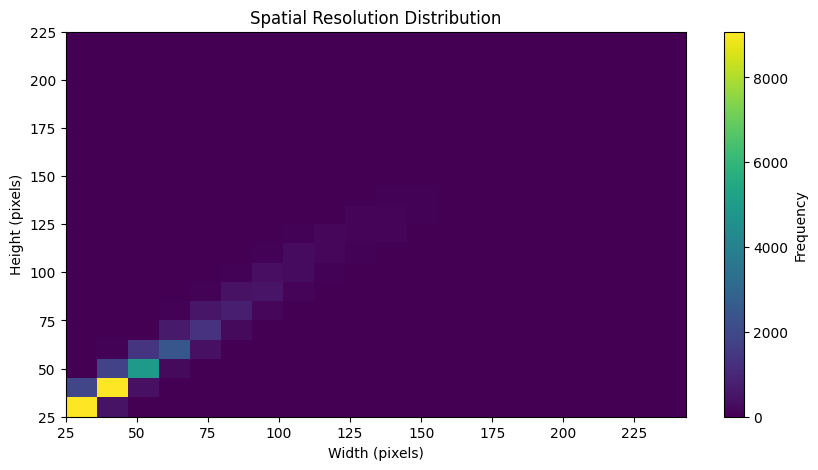

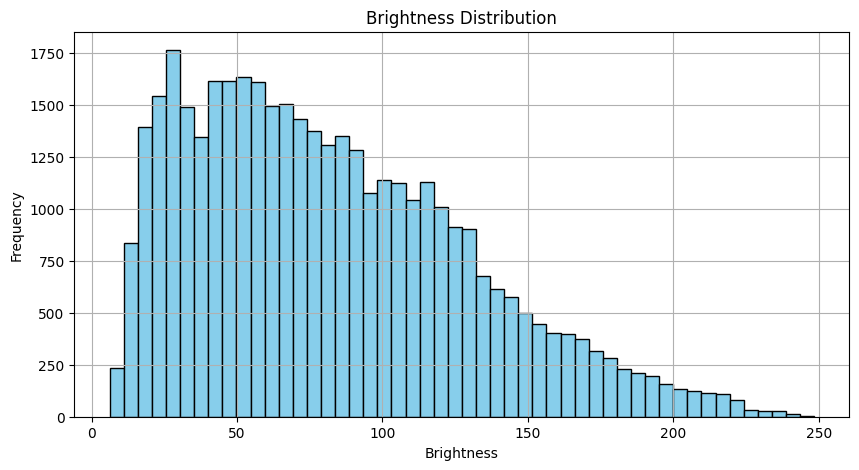

In [6]:
# Calculate spatial resolutions and brightness for each image
spatial_resolutions = []
brightness_values = []

for idx in range(num_samples):
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)
    # Spatial resolution
    spatial_resolutions.append(img.shape[:2])  # (height, width)
    # Brightness (average pixel intensity)
    brightness_values.append(np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)))

# Convert to numpy arrays for easier manipulation
spatial_resolutions = np.array(spatial_resolutions)
brightness_values = np.array(brightness_values)

# Plot spatial resolution distribution
plt.figure(figsize=(10, 5))
plt.hist2d(spatial_resolutions[:, 1], spatial_resolutions[:, 0], bins=(20, 20))
plt.colorbar(label='Frequency')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.title('Spatial Resolution Distribution')
plt.show()

# Plot brightness distribution
plt.figure(figsize=(10, 5))
plt.hist(brightness_values, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Brightness Distribution')
plt.grid(True)
plt.show()

#### Conclusion:

##### Spatial Resolution Distribution:

-   The spatial resolution distribution plot shows the distribution of image resolutions (width and height) in the dataset.
-   From the plot, it appears that the dataset contains images with varying resolutions, ranging from low to high.
-   There is no clear bias towards specific resolution ranges, indicating a diverse set of images in terms of spatial resolution.

##### Brightness Distribution:

-   The brightness distribution plot shows the distribution of average brightness values across all images in the dataset.
-   Different classes of traffic signs may have different levels of brightness due to factors such as lighting conditions and background environments.
-   By examining the brightness distribution, we can identify any classes that tend to have significantly brighter or darker images compared to others.
-   Further analysis may be needed to understand the implications of brightness variations on model performance and generalization.

Overall, analyzing spatial resolution and brightness distributions provides valuable insights into the variability and potential biases present in the GTSDB dataset. This information can guide preprocessing steps and model training strategies to account for these variations and ensure robust performance across different conditions.